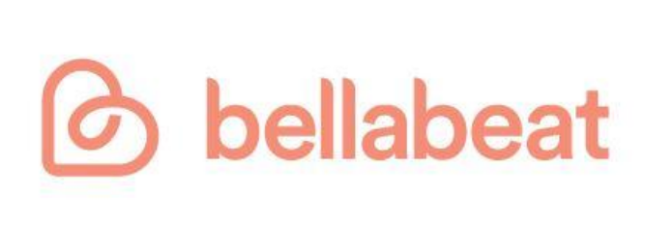

# Introduction
#### Welcome to the Bellabeat data analysis case study!

# Scenario

#### Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, 

#### cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities 

#### for the company.

### **Products**

**Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress,menstrual cycle,and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

**Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

**Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

**Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

**Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.


# Ask

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Data Preparation


In [154]:
install.packages("hms")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [155]:
library(plyr)
library(tidyverse)
library(skimr)
library(ggplot2)
library(janitor)
library(lubridate)
library(gridExtra)
library(rmarkdown)
library(dplyr)
library(hms)

## Data Sources

Import CSV data from all the datasets from Kaggle.


In [156]:
fitbit_activity = read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
fitbit_heartbeat = read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
fitbit_sleep = read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
fitbit_body = read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

## Data Checkup

The focus of checkup was primarily on the daily activity, sleep & hear-rate data.

# Data Processing

## Summary:

* Inspect each dataframe for missing values.
* Standardize the column names.
* Remove erroneous outliers.
* Convert data values into consistent metrics.
* Merge & split columns as required
* Fix typos
* Sort records
* Remove machine-dependent/ irrelevant columns

# 1. FitBit Fitness Tracker Data:- 

*** ACITIVITY**

In [157]:
head(fitbit_activity)

skim_without_charts(fitbit_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityDate,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,TotalSteps,0,1,NA,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
4,numeric,TotalDistance,0,1,NA,NA,NA,NA,NA,5.489702e+00,3.924606e+00,0,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
5,numeric,TrackerDistance,0,1,NA,NA,NA,NA,NA,5.475351e+00,3.907276e+00,0,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
6,numeric,LoggedActivitiesDistance,0,1,NA,NA,NA,NA,NA,1.081709e-01,6.198965e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
7,numeric,VeryActiveDistance,0,1,NA,NA,NA,NA,NA,1.502681e+00,2.658941e+00,0,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
8,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
9,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01


── Data Summary ────────────────────────
                           Values         
Name                       fitbit_activity
Number of rows             940            
Number of columns          15             
_______________________                   
Column type frequency:                    
  character                1              
  numeric                  14             
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityDate          0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3

In [158]:
fitbit_activity_copy <- fitbit_activity %>% 
clean_names() %>% 
distinct() %>% 
rename(date = activity_date, steps = total_steps, distance = total_distance) %>% 
mutate(date = as.Date(date, "%m/%d/%Y"), week_day = weekdays(date)) %>%  
arrange(id,date)

In [159]:
head(fitbit_activity_copy)

id,date,steps,distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


* **HEARTBEAT**

In [160]:
fitbit_heartbeat_copy <- fitbit_heartbeat %>%
clean_names() %>%
distinct() %>%
separate (col = time, into = c("date", "time"), sep = " ") %>%
rename(heart_rate = value) %>%
mutate(
    date = as.Date(date, format = "%m/%d/%Y"), 
    time = as_hms(time),
) #use the hms package, which provides a suitable class for times. 

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2483658 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [161]:
fitbit_heartbeat_copy <- fitbit_heartbeat_copy %>% 
group_by(id, date, time) %>% 
summarize(heart_rate = mean(heart_rate)) %>% 
arrange(id, date, time)

`summarise()` has grouped output by 'id', 'date'. You can override using the
`.groups` argument.


In [162]:
head(fitbit_heartbeat_copy)

id,date,time,heart_rate
<dbl>,<date>,<time>,<dbl>
2022484408,2016-04-12,01:00:00,66
2022484408,2016-04-12,01:00:15,66
2022484408,2016-04-12,01:00:20,67
2022484408,2016-04-12,01:00:35,66
2022484408,2016-04-12,01:00:50,66
2022484408,2016-04-12,01:01:00,67


###  * **Sleep**

In [163]:
head(fitbit_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [164]:
fitbit_sleep_copy <- fitbit_sleep %>% 
clean_names() %>% 
distinct() %>%
mutate(sleep_day = as.Date(sleep_day,"%m/%d/%Y")) %>% 
rename(date = sleep_day, sleep_time = total_minutes_asleep, bed_time = total_time_in_bed)

In [165]:
fitbit_sleep_copy <- fitbit_sleep_copy %>% 
select(-total_sleep_records) %>% 
mutate(wake_time = bed_time - sleep_time) %>% 
arrange(id, date)

In [166]:
head(fitbit_sleep_copy)

id,date,sleep_time,bed_time,wake_time
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,327,346,19
1503960366,2016-04-13,384,407,23
1503960366,2016-04-15,412,442,30
1503960366,2016-04-16,340,367,27
1503960366,2016-04-17,700,712,12
1503960366,2016-04-19,304,320,16


### * **Body**

In [167]:
fitbit_body_copy <- fitbit_body %>% 
clean_names() %>% 
distinct() %>% 
rename(weight = weight_kg) %>% 
mutate(date = as.Date(date, "%m/%d/%Y"), height = sqrt(weight/bmi)* 100) %>% 
arrange(id,date) %>% 
select(-c(log_id, weight_pounds))


In [168]:
head(fitbit_body_copy)

id,date,weight,fat,bmi,is_manual_report,height
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02,52.6,22,22.65,TRUE,152.3908
1503960366,2016-05-03,52.6,NA,22.65,TRUE,152.3908
1927972279,2016-04-13,133.5,NA,47.54,FALSE,167.5757
2873212765,2016-04-21,56.7,NA,21.45,TRUE,162.5840
2873212765,2016-05-12,57.3,NA,21.69,TRUE,162.5352
4319703577,2016-04-17,72.4,25,27.45,TRUE,162.4045


# **Analyze and Visualize**
Now that data is cleaned, we can look into the number of unique users and the range of dates across all of the data frames.

In [169]:
# Print the summary of the activity data
print(paste("activity data has", n_distinct(fitbit_activity_copy$id), "Ids, data tracked for", 
            n_distinct(fitbit_activity_copy$date), "days between", min(fitbit_activity_copy$date), 
            "and", max(fitbit_activity_copy$date)))


[1] "activity data has 33 Ids, data tracked for 31 days between 2016-04-12 and 2016-05-12"


In [170]:
print(paste("heartrate has ", n_distinct(fitbit_heartbeat_copy$id), " Ids, data tracked for ", 
            n_distinct(fitbit_heartbeat_copy$date), " days between ", min(fitbit_heartbeat_copy$date), 
            " and ", max(fitbit_heartbeat_copy$date)))

[1] "heartrate has  14  Ids, data tracked for  31  days between  2016-04-12  and  2016-05-12"


In [171]:
print(paste("sleep has ", n_distinct(fitbit_sleep_copy$id), " Ids, data tracked for ", 
            n_distinct(fitbit_sleep_copy$date), " days between ", min(fitbit_sleep_copy$date), 
            " and ", max(fitbit_sleep_copy$date)))


[1] "sleep has  24  Ids, data tracked for  31  days between  2016-04-12  and  2016-05-12"


In [172]:
print(paste("weight has ", n_distinct(fitbit_body_copy$id), " Ids, data tracked for ", 
            n_distinct(fitbit_body_copy$date), " days between ", min(fitbit_body_copy$date), 
            " and ", max(fitbit_body_copy$date)))

[1] "weight has  8  Ids, data tracked for  31  days between  2016-04-12  and  2016-05-12"


### **Avaliable data**

* 33 unique users
* Data is performed bewtween (31 days) 2016-04-12 and 2016-05-12 
* I have taken 4 basic tracked: steps, sleep, heart rate, weight


In [173]:
colnames(fitbit_activity_copy)
colnames(fitbit_heartbeat_copy)
colnames(fitbit_sleep_copy)
colnames(fitbit_body_copy)

[1] "id"                         "date"                      
 [3] "steps"                      "distance"                  
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "week_day"

[1] "id"         "date"       "time"       "heart_rate"

[1] "id"         "date"       "sleep_time" "bed_time"   "wake_time"

[1] "id"               "date"             "weight"           "fat"             
[5] "bmi"              "is_manual_report" "height"

In [174]:
max_steps <- max(fitbit_activity_copy$steps, na.rm = TRUE)
min_steps <- min(fitbit_activity_copy$steps, na.rm = TRUE)
print(paste("The maximum number of steps is:", max_steps))
print(paste("The minimum number of steps is:", min_steps))

[1] "The maximum number of steps is: 36019"
[1] "The minimum number of steps is: 0"


In [175]:
# For the daily activity dataframe:
fitbit_activity_copy %>%  
  select(steps,
         distance,
         calories) %>%
  summary()


     steps          distance         calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

In [176]:
fitbit_sleep_copy %>%  
  select(sleep_time,
         bed_time) %>%
  summary()


   sleep_time       bed_time    
 Min.   : 58.0   Min.   : 61.0  
 1st Qu.:361.0   1st Qu.:403.8  
 Median :432.5   Median :463.0  
 Mean   :419.2   Mean   :458.5  
 3rd Qu.:490.0   3rd Qu.:526.0  
 Max.   :796.0   Max.   :961.0  

`geom_smooth()` using formula = 'y ~ x'


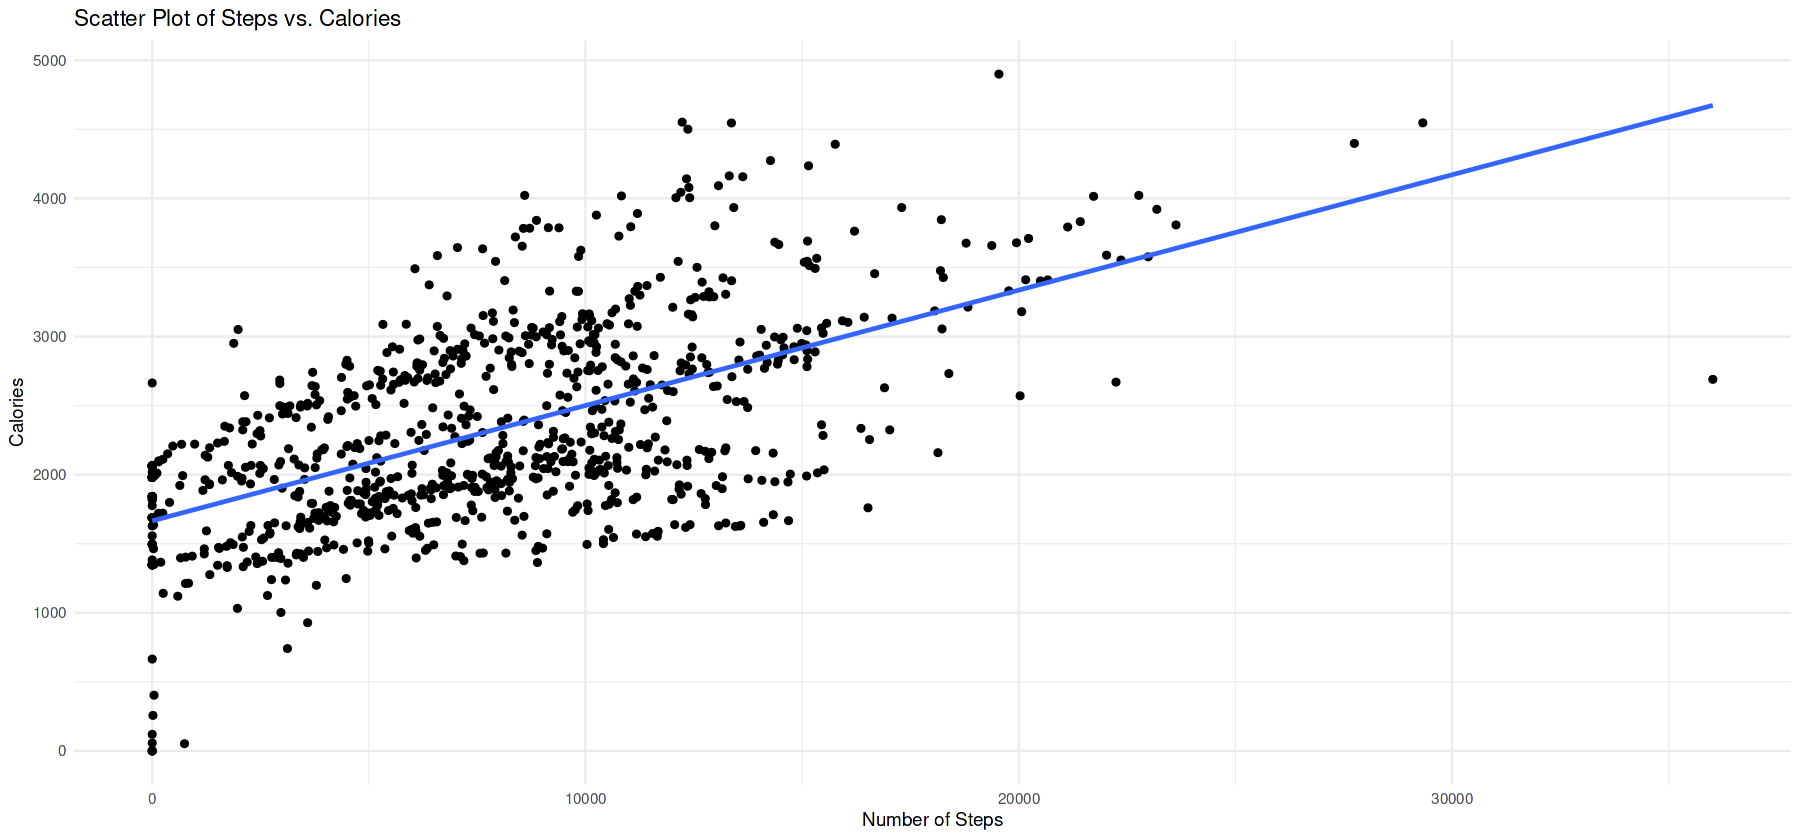

In [177]:
# Load required library
library(ggplot2)

options(repr.plot.width = 15, repr.plot.height = 7)

# Create the scatter plot
ggplot(fitbit_activity_copy, aes(x = steps, y = calories)) + 
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) + # Added method "lm" for linear model and removed the shaded area
  labs(title = "Scatter Plot of Steps vs. Calories",
       x = "Number of Steps",
       y = "Calories") +
  theme_minimal()


##### By analyzing the above graph, it's evident that there is a strong correlation between the number of steps and the calories burned: **the more steps a user takes, the more calories they burn.**

##### Consequently, I will investigate the calorie data more thoroughly within the dataset. 

As a starting point, let's examine the relationship between the day of the week and the calories burned.

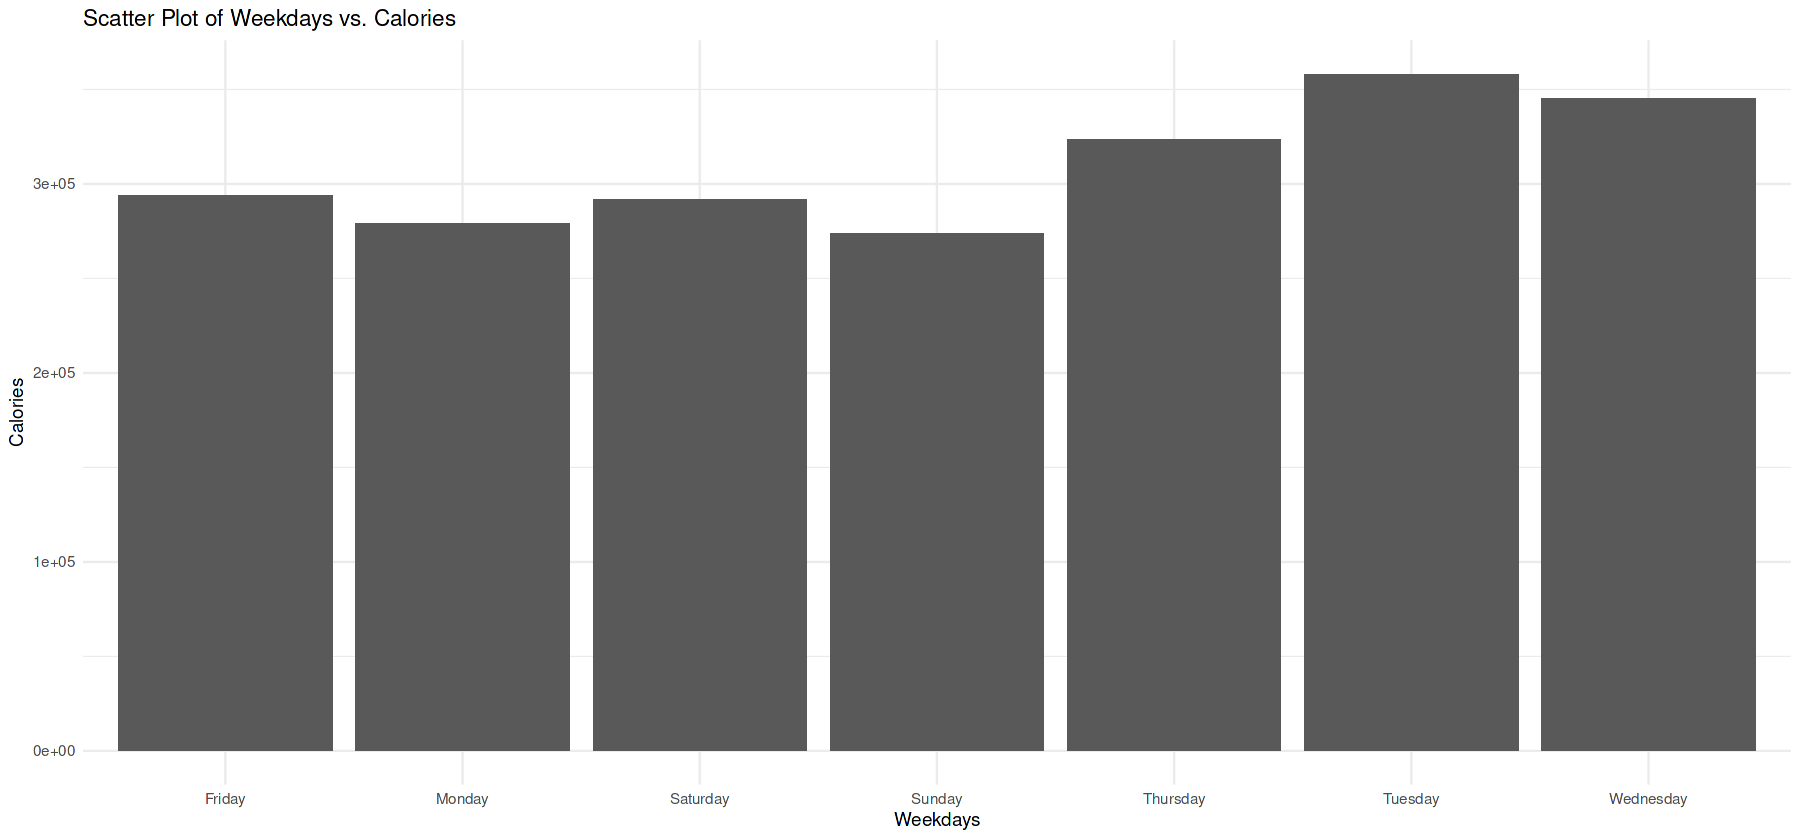

In [178]:
  # Create the scatter plot
  ggplot(fitbit_activity_copy, aes(x = week_day , y = calories)) + 
    geom_col() +
    labs(title = "Scatter Plot of Weekdays vs. Calories",
         x = "Weekdays",
         y = "Calories") +
    theme_minimal()

#### So far, the above graph does not reveal any significant relationship between the days of the week and the calories burned.

In [179]:
# Original distinct IDs
original_ids <- fitbit_activity_copy %>% distinct(id) %>% pull(id)

# Distinct IDs for calories > 2304
high_cal_ids <- fitbit_activity_copy %>% filter(calories > 2304) %>% distinct(id) %>% pull(id)

# Distinct IDs for calories < 1500
low_cal_ids <- fitbit_activity_copy %>% filter(calories < 1500) %>% distinct(id) %>% pull(id)

# Check IDs that are in both groups
common_ids <- intersect(low_cal_ids, high_cal_ids)

# IDs only in the high-calorie group
only_high_cal_ids <- setdiff(high_cal_ids, common_ids)

# IDs only in the low-calorie group
only_low_cal_ids <- setdiff(low_cal_ids, common_ids)

# IDs in both groups (moderate-calorie)
moderate_cal_ids <- common_ids

# Add new column 'calories_group'
fitbit_activity_copy <- fitbit_activity_copy %>%
  mutate(
    calories_group = case_when(
      id %in% only_high_cal_ids ~ "High",
      id %in% only_low_cal_ids ~ "Low",
      id %in% moderate_cal_ids ~ "Moderate",
      TRUE ~ NA_character_  # Handle any other cases (though in this scenario it shouldn't occur)
    )
  )

# Print the first few rows to check the result
head(fitbit_activity_copy)


id,date,steps,distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day,calories_group
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,Low
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,Low
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,Low
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,Low
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,Low
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,Low


#### Now, let's divide the data into three categories based on calorie consumption: high, moderate, and low. We will create a new column to signify the user's category.

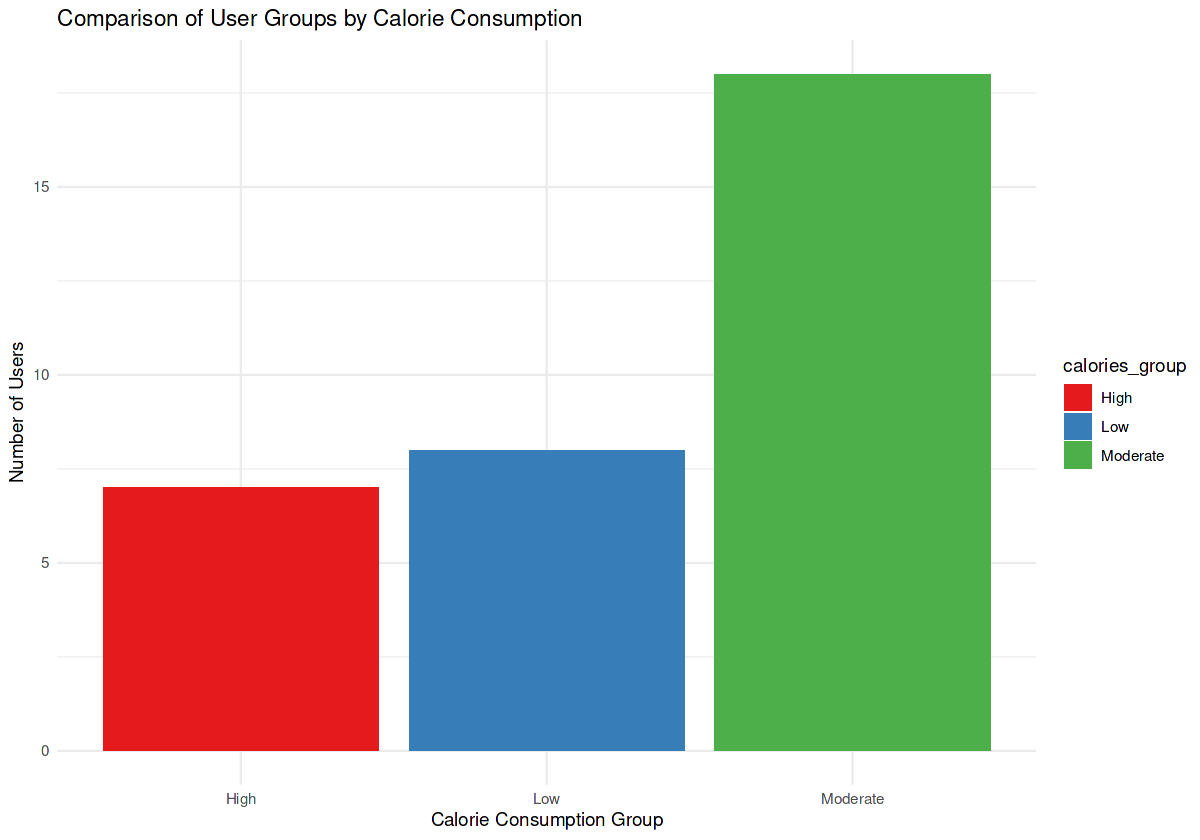

In [180]:
# Summarize data
calorie_group_summary <- fitbit_activity_copy %>%
  distinct(id, calories_group) %>%
  group_by(calories_group) %>%
  summarize(count = n())

# Plot the bar chart
options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(calorie_group_summary, aes(x = calories_group, y = count, fill = calories_group)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of User Groups by Calorie Consumption",
       x = "Calorie Consumption Group",
       y = "Number of Users") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1") 


#### We can clearly see there are 7 number of High calories User, 8 number of Low calories User and rest of 18 are moderate User.
 
##### Lets check the Users in weely basic.
##### Then, check the distribution of Distances by Activity Level for Each Calorie Group


`summarise()` has grouped output by 'week_day'. You can override using the
`.groups` argument.


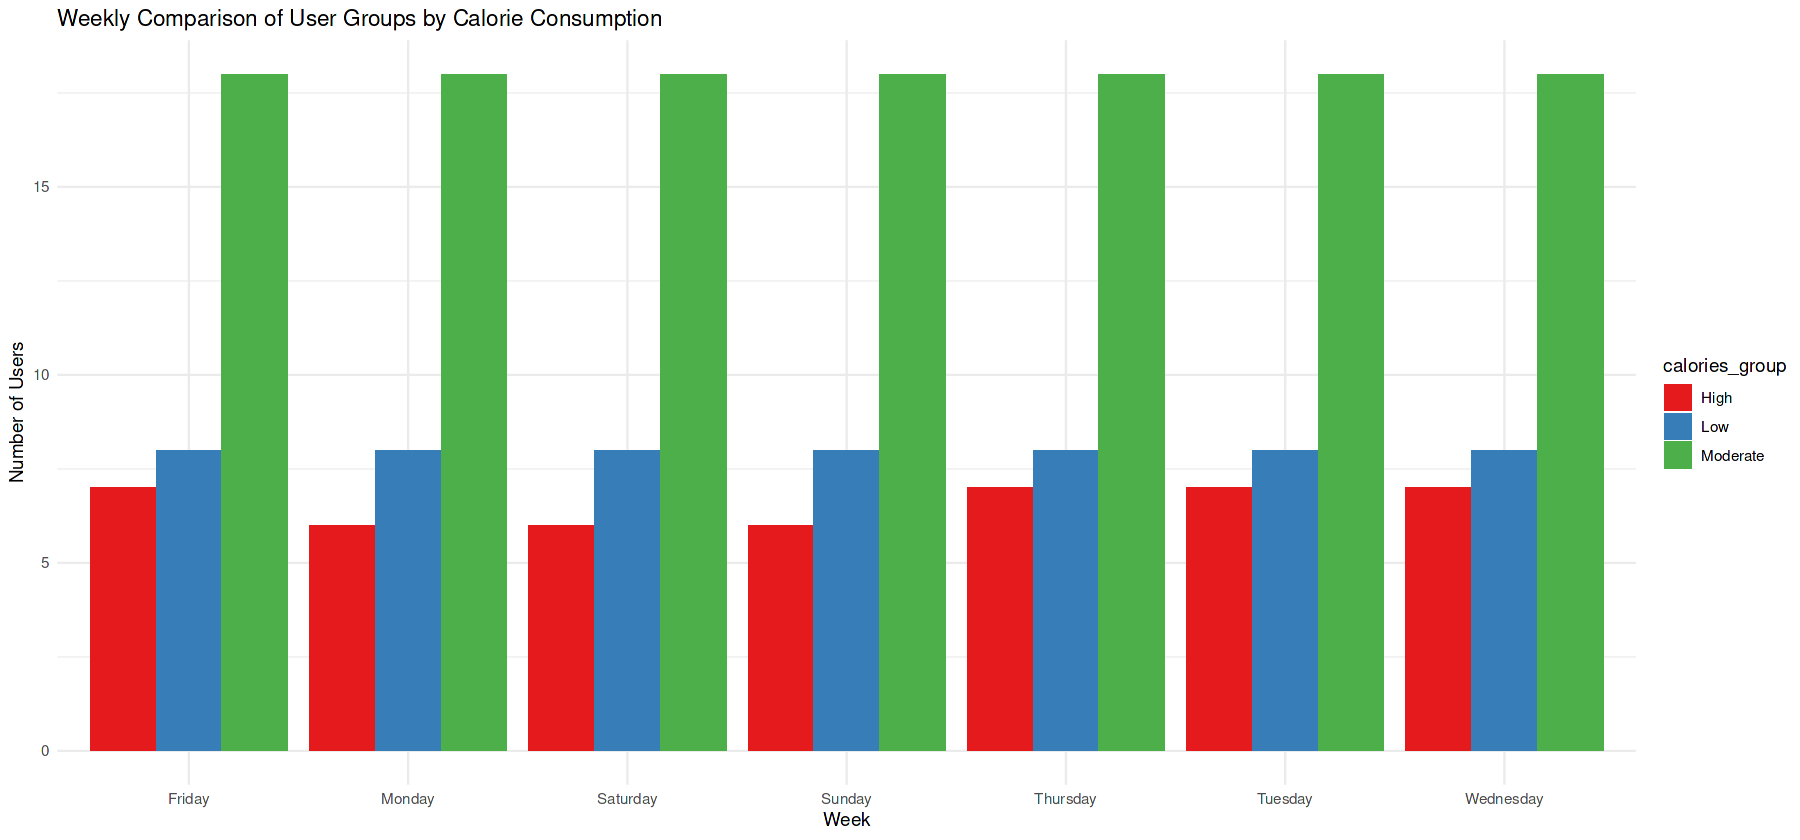

In [181]:
# Summarize data
weekly_summary <- fitbit_activity_copy %>%
  distinct(id, week_day, calories_group) %>%
  group_by(week_day, calories_group) %>%
  summarize(count = n())

# Plot the bar chart
options(repr.plot.width = 15, repr.plot.height = 7)

ggplot(weekly_summary, aes(x = factor(week_day), y = count, fill = calories_group)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Weekly Comparison of User Groups by Calorie Consumption",
       x = "Week",
       y = "Number of Users") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1") # Optional: for better colors

Warning message:
“Unknown palette: "Set4"”


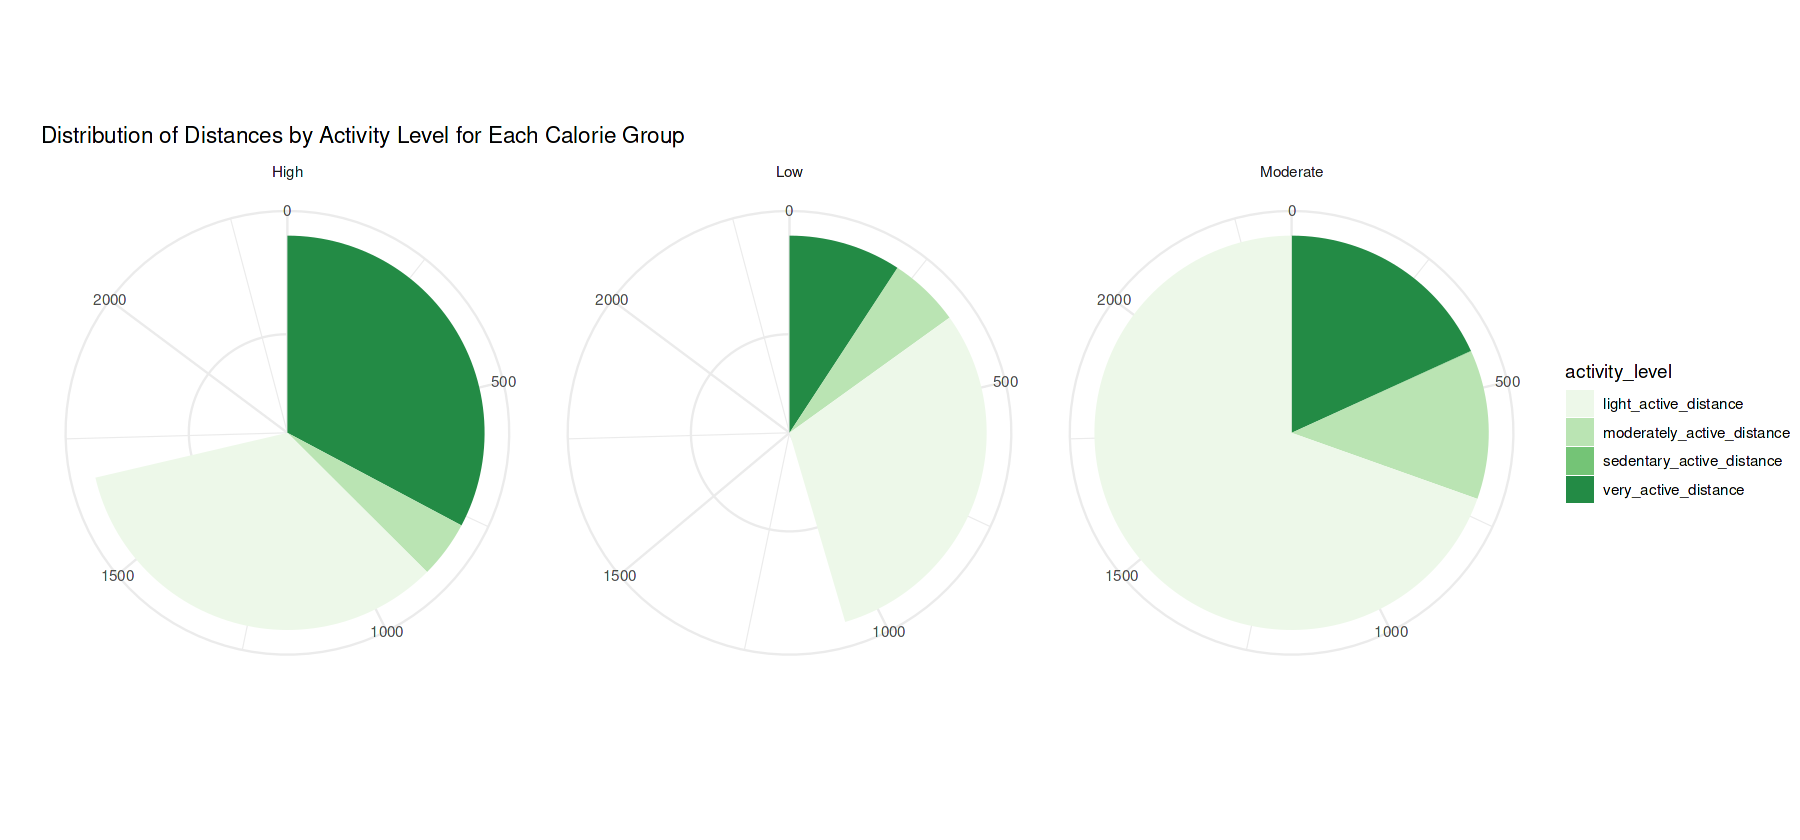

In [182]:
# Summarize the total distances for each category
distance_summary <- fitbit_activity_copy %>%
  group_by(calories_group) %>%
  summarize(
    very_active_distance = sum(very_active_distance, na.rm = TRUE),
    moderately_active_distance = sum(moderately_active_distance, na.rm = TRUE),
    light_active_distance = sum(light_active_distance, na.rm = TRUE),
    sedentary_active_distance = sum(sedentary_active_distance, na.rm = TRUE)
  )

# Reshape the data to a long format
distance_long <- distance_summary %>%
  pivot_longer(
    cols = c(very_active_distance, moderately_active_distance, light_active_distance, sedentary_active_distance),
    names_to = "activity_level",
    values_to = "distance"
  )

# Create the pie charts
options(repr.plot.width = 15, repr.plot.height = 7)

ggplot(distance_long, aes(x = "", y = distance, fill = activity_level)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  facet_wrap(~ calories_group) +
  labs(title = "Distribution of Distances by Activity Level for Each Calorie Group",
       x = "",
       y = "") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set4") 

In [183]:
colnames(fitbit_activity_copy)

[1] "id"                         "date"                      
 [3] "steps"                      "distance"                  
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "week_day"                  
[17] "calories_group"

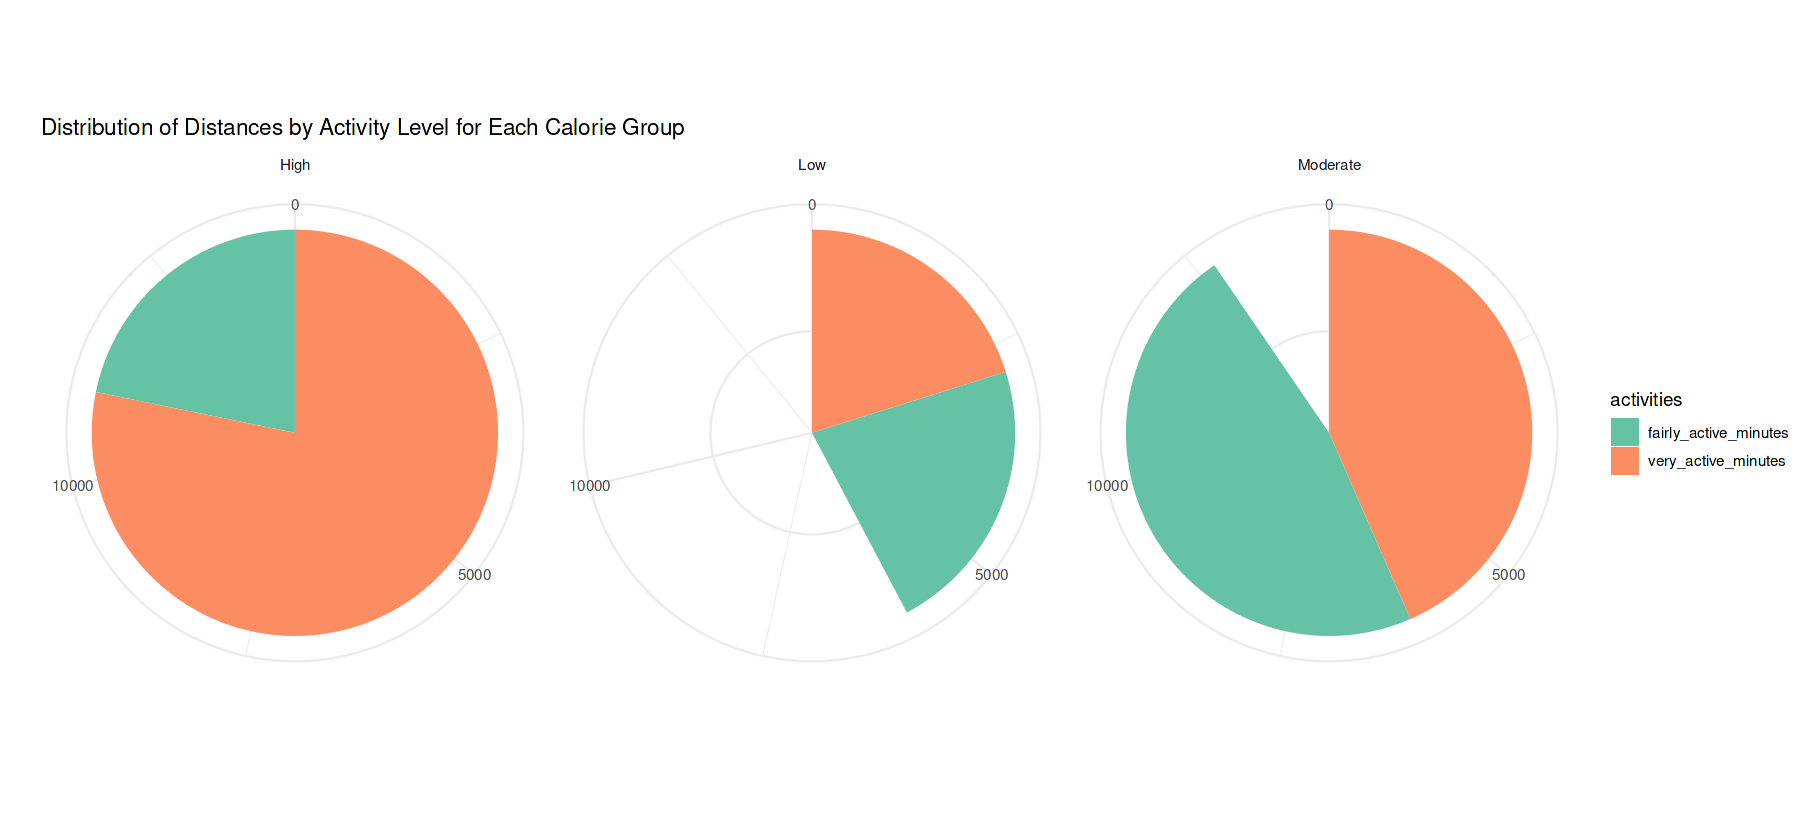

In [184]:
# Summarize the total activity for each category
distance_summary <- fitbit_activity_copy %>%
  group_by(calories_group) %>%
  summarize(
    very_active_minutes = sum(very_active_minutes, na.rm = TRUE),
    fairly_active_minutes = sum(fairly_active_minutes, na.rm = TRUE),
  )

# Reshape the data to a long format
distance_long <- distance_summary %>%
  pivot_longer(
    cols = c(very_active_minutes, fairly_active_minutes),
    names_to = "activities",
    values_to = "time_taken"
  )

# Create the pie charts
options(repr.plot.width = 15, repr.plot.height = 7)

ggplot(distance_long, aes(x = "", y = time_taken, fill = activities)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  facet_wrap(~ calories_group) +
  labs(title = "Distribution of Distances by Activity Level for Each Calorie Group",
       x = "",
       y = "") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2") 

* **Original unique IDs: 33**
* IDs only in high calories group **7**
* IDs only in modarate calories group **18**
* IDs only in low calories group: **8**

75% Users are very much daily in terms of activity scale and as well as calories scale. 
25% users are not very active and not so consistent in terms of calories and activities scale although they are use the fitbit watch regularly.

In [185]:
# Correctly join the data frames using inner_join
merge_activity_heartbeat <- fitbit_activity_copy %>% inner_join(fitbit_heartbeat_copy, by = c("id","date"))

head(merge_activity_heartbeat)

id,date,steps,distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day,calories_group,time,heart_rate
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<time>,<dbl>
2022484408,2016-04-12,11875,8.34,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,Tuesday,High,01:00:00,66
2022484408,2016-04-12,11875,8.34,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,Tuesday,High,01:00:15,66
2022484408,2016-04-12,11875,8.34,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,Tuesday,High,01:00:20,67
2022484408,2016-04-12,11875,8.34,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,Tuesday,High,01:00:35,66
2022484408,2016-04-12,11875,8.34,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,Tuesday,High,01:00:50,66
2022484408,2016-04-12,11875,8.34,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,Tuesday,High,01:01:00,67


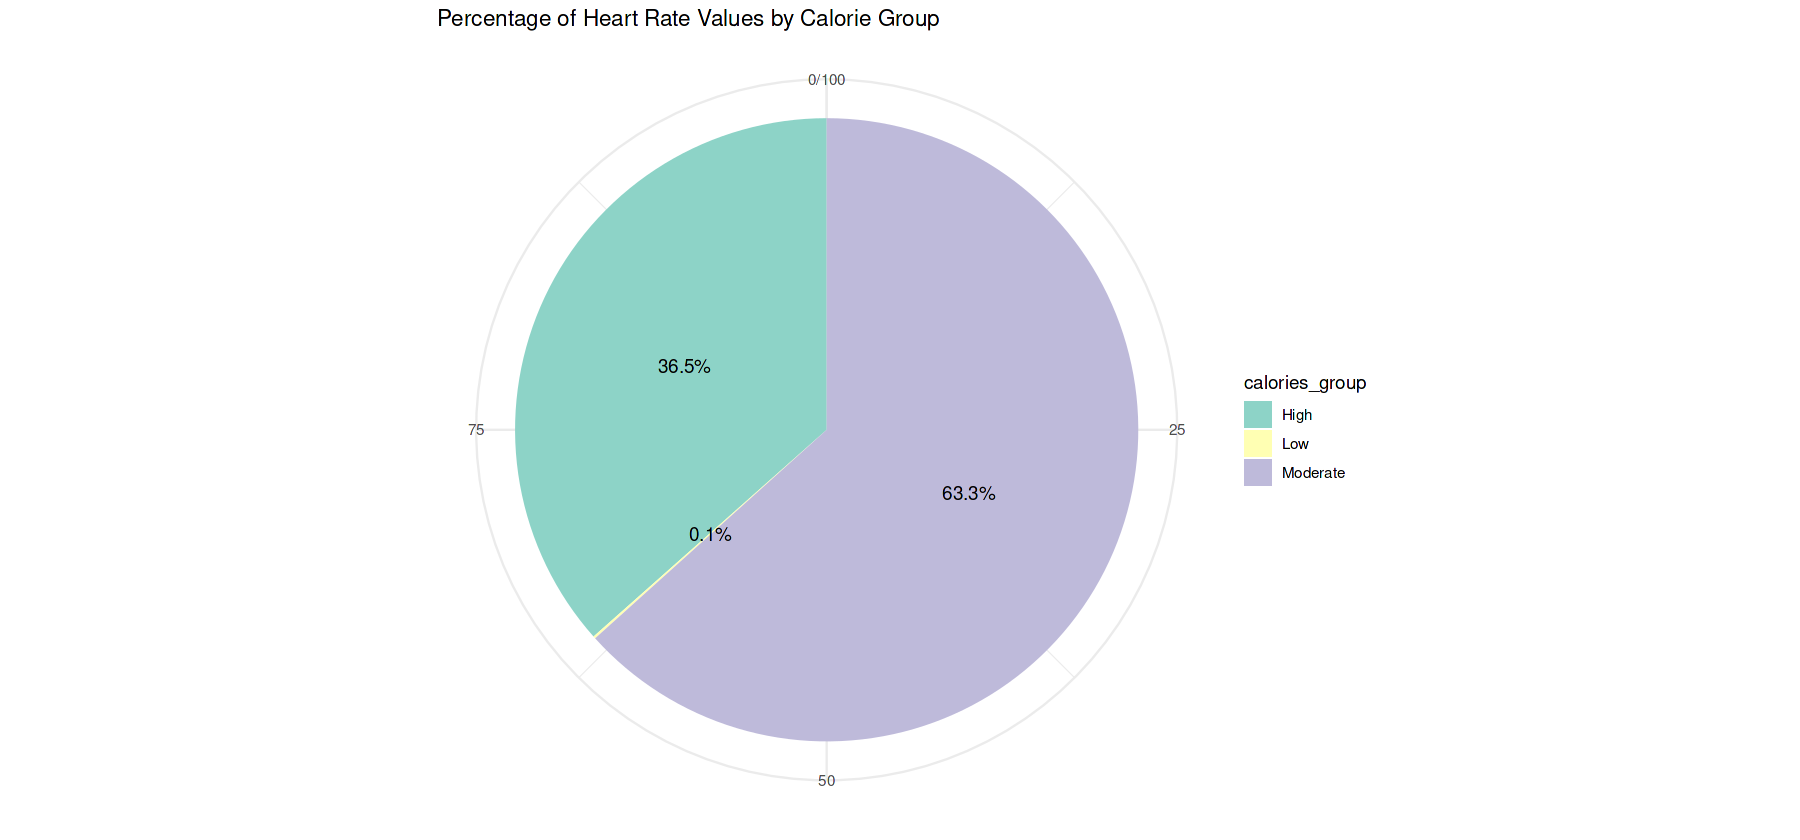

In [186]:
# Load necessary library
library(dplyr)
library(ggplot2)  # for plotting


# Group by calorie_group and filter rows with non-NA heart_rate values
calories_with_heart_rate <- merge_activity_heartbeat %>%
  filter(!is.na(heart_rate)) %>%
  group_by(calories_group) %>%
  summarise(heart_rate_count = n())

# Calculate percentages
calories_with_heart_rate <- mutate(calories_with_heart_rate,
                                   percentage = heart_rate_count / sum(heart_rate_count) * 100)

# Create a pie chart
ggplot(calories_with_heart_rate, aes(x = "", y = percentage, fill = calories_group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Set3") +  # Change color palette as needed
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Percentage of Heart Rate Values by Calorie Group",
       fill = "calories_group",
       x = NULL, y = NULL) +
  theme_minimal()

Mostly High and moderate User are comfertable to measre the heartrate through fitbit device.

it is clearly show 0.1% users of low calories user measure the hearrate.

In [187]:
# Load necessary library
library(dplyr)

# Group by calorie_group and filter rows with non-NA heart_rate values
calories_with_heart_rate <- merge_activity_heartbeat %>%
  filter(!is.na(heart_rate)) %>%
  group_by(calories_group) %>%
  summarise(
    heart_rate_count = n(),
    average_heart_rate = mean(heart_rate)
  )

# Display the results
print(calories_with_heart_rate)

# A tibble: 3 × 3
  calories_group heart_rate_count average_heart_rate
  <chr>                     <int>              <dbl>
1 High                     752772               75.3
2 Low                        2490               93.8
3 Moderate                1304580               80.0


In turm of the heart rate:-  
* High calories users have avarage of 75 bpm.
* Low calories users have average of 94 bpm approx.The input is too low to count the avagare so that it came so high in turms of heart rate avarage.


#### In term of heart rate count, The high and moderate calories user have more 99.9% input,whereas low calories user having 0.1% input in the heartbeat data. 

In [188]:
merge_activity_sleep <- fitbit_activity_copy %>% inner_join(fitbit_sleep_copy, by = c("id","date"))

head(merge_activity_sleep)

id,date,steps,distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day,calories_group,sleep_time,bed_time,wake_time
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,Low,327,346,19
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,Low,384,407,23
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,Low,412,442,30
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,Low,340,367,27
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,Low,700,712,12
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,Tuesday,Low,304,320,16


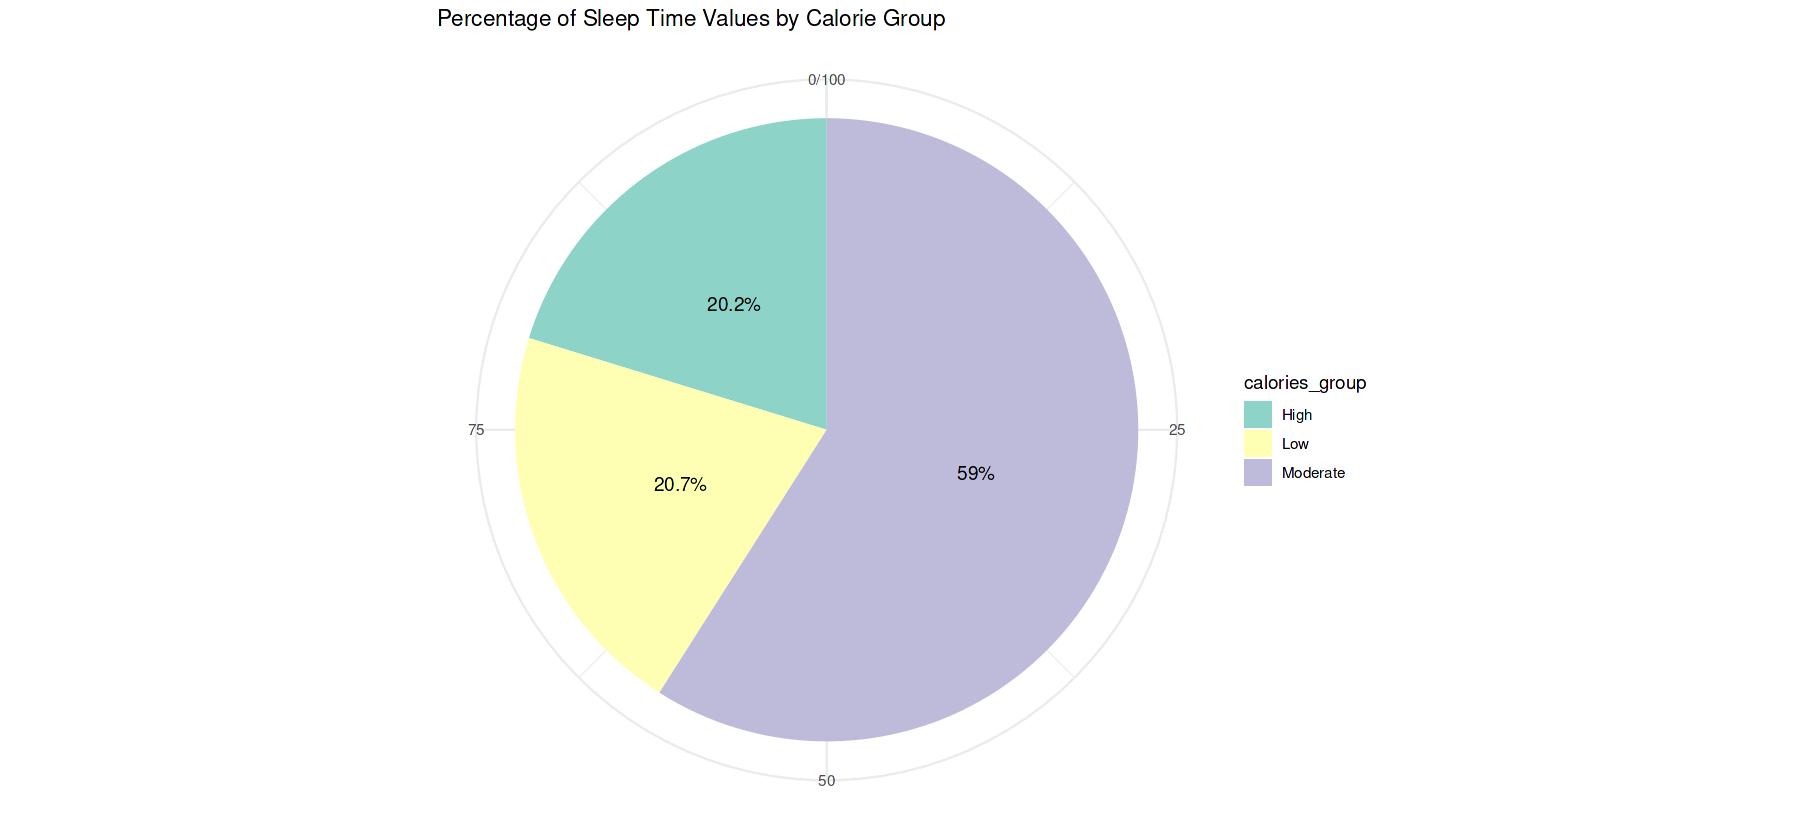

In [189]:
# Group by calorie_group and filter rows with non-NA sleep values
calories_with_sleep_time <- merge_activity_sleep %>%
  filter(!is.na(sleep_time)) %>%
  group_by(calories_group) %>%
  summarise(sleep_time_count = n())

# Calculate percentages
calories_with_sleep_time <- mutate(calories_with_sleep_time,
                                   percentage = sleep_time_count / sum(sleep_time_count) * 100)

# Create a pie chart
ggplot(calories_with_sleep_time, aes(x = "", y = percentage, fill = calories_group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Set3") +  # Change color palette as needed
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Percentage of Sleep Time Values by Calorie Group",
       fill = "calories_group",
       x = NULL, y = NULL) +
  theme_minimal()

In [190]:
# Group by calorie_group and filter rows with non-NA heart_rate values
calories_with_sleep_time <- merge_activity_sleep %>%
  filter(!is.na(sleep_time)) %>%
  group_by(calories_group) %>%
  summarise(
    sleep_time_count = n(),
    average_sleep_time = mean(sleep_time)
  )

# Display the results
print(calories_with_sleep_time)

# A tibble: 3 × 3
  calories_group sleep_time_count average_sleep_time
  <chr>                     <int>              <dbl>
1 High                         83               423.
2 Low                          85               393.
3 Moderate                    242               427.


In turm of the heart rate:-  
* High calories users have avarage of 423 hr.
* Modarate calories users have avarage of 427 hr.
* Low calories users have average of 393 hr.

#### In term of sleep count,The high calories user have more 20% input, The high calories user have more 59% input,whereas low calories user having 21% input in the sleep data.

Sleep feature is used throught out equally among everyone all the user compare to daily data set.


In [191]:
merge_activity_body <- fitbit_activity_copy %>% inner_join(fitbit_body_copy, by = c("id","date"))

head(merge_activity_body)

id,date,steps,distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,lightly_active_minutes,sedentary_minutes,calories,week_day,calories_group,weight,fat,bmi,is_manual_report,height
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02,14727,9.71,9.71,0,3.21,0.57,5.92,0.00,⋯,277,798,2004,Monday,Low,52.6,22,22.65,TRUE,152.3908
1503960366,2016-05-03,15103,9.66,9.66,0,3.73,1.05,4.88,0.00,⋯,254,816,1990,Tuesday,Low,52.6,NA,22.65,TRUE,152.3908
1927972279,2016-04-13,356,0.25,0.25,0,0.00,0.00,0.25,0.00,⋯,32,986,2151,Wednesday,Moderate,133.5,NA,47.54,FALSE,167.5757
2873212765,2016-04-21,8859,5.98,5.98,0,0.13,0.37,5.47,0.01,⋯,371,1057,1970,Thursday,Low,56.7,NA,21.45,TRUE,162.5840
2873212765,2016-05-12,7566,5.11,5.11,0,0.00,0.00,5.11,0.00,⋯,268,720,1431,Thursday,Low,57.3,NA,21.69,TRUE,162.5352
4319703577,2016-04-17,29,0.02,0.02,0,0.00,0.00,0.02,0.00,⋯,3,1363,1464,Sunday,Moderate,72.4,25,27.45,TRUE,162.4045


In [192]:
# Load necessary library
library(dplyr)

# Create the Weight_Status column based on bmi value
merge_activity_body <- merge_activity_body %>%
  mutate(Weight_Status = case_when(
    bmi < 18.5 ~ "Underweight",
    bmi >= 18.5 & bmi <= 24.9 ~ "Healthy Weight",
    bmi >= 25.0 & bmi <= 29.9 ~ "Overweight",
    bmi >= 30.0 ~ "Obesity"
  ))

# Display the first few rows of the updated data frame
head(merge_activity_body)


id,date,steps,distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,sedentary_minutes,calories,week_day,calories_group,weight,fat,bmi,is_manual_report,height,Weight_Status
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
1503960366,2016-05-02,14727,9.71,9.71,0,3.21,0.57,5.92,0.00,⋯,798,2004,Monday,Low,52.6,22,22.65,TRUE,152.3908,Healthy Weight
1503960366,2016-05-03,15103,9.66,9.66,0,3.73,1.05,4.88,0.00,⋯,816,1990,Tuesday,Low,52.6,NA,22.65,TRUE,152.3908,Healthy Weight
1927972279,2016-04-13,356,0.25,0.25,0,0.00,0.00,0.25,0.00,⋯,986,2151,Wednesday,Moderate,133.5,NA,47.54,FALSE,167.5757,Obesity
2873212765,2016-04-21,8859,5.98,5.98,0,0.13,0.37,5.47,0.01,⋯,1057,1970,Thursday,Low,56.7,NA,21.45,TRUE,162.5840,Healthy Weight
2873212765,2016-05-12,7566,5.11,5.11,0,0.00,0.00,5.11,0.00,⋯,720,1431,Thursday,Low,57.3,NA,21.69,TRUE,162.5352,Healthy Weight
4319703577,2016-04-17,29,0.02,0.02,0,0.00,0.00,0.02,0.00,⋯,1363,1464,Sunday,Moderate,72.4,25,27.45,TRUE,162.4045,Overweight


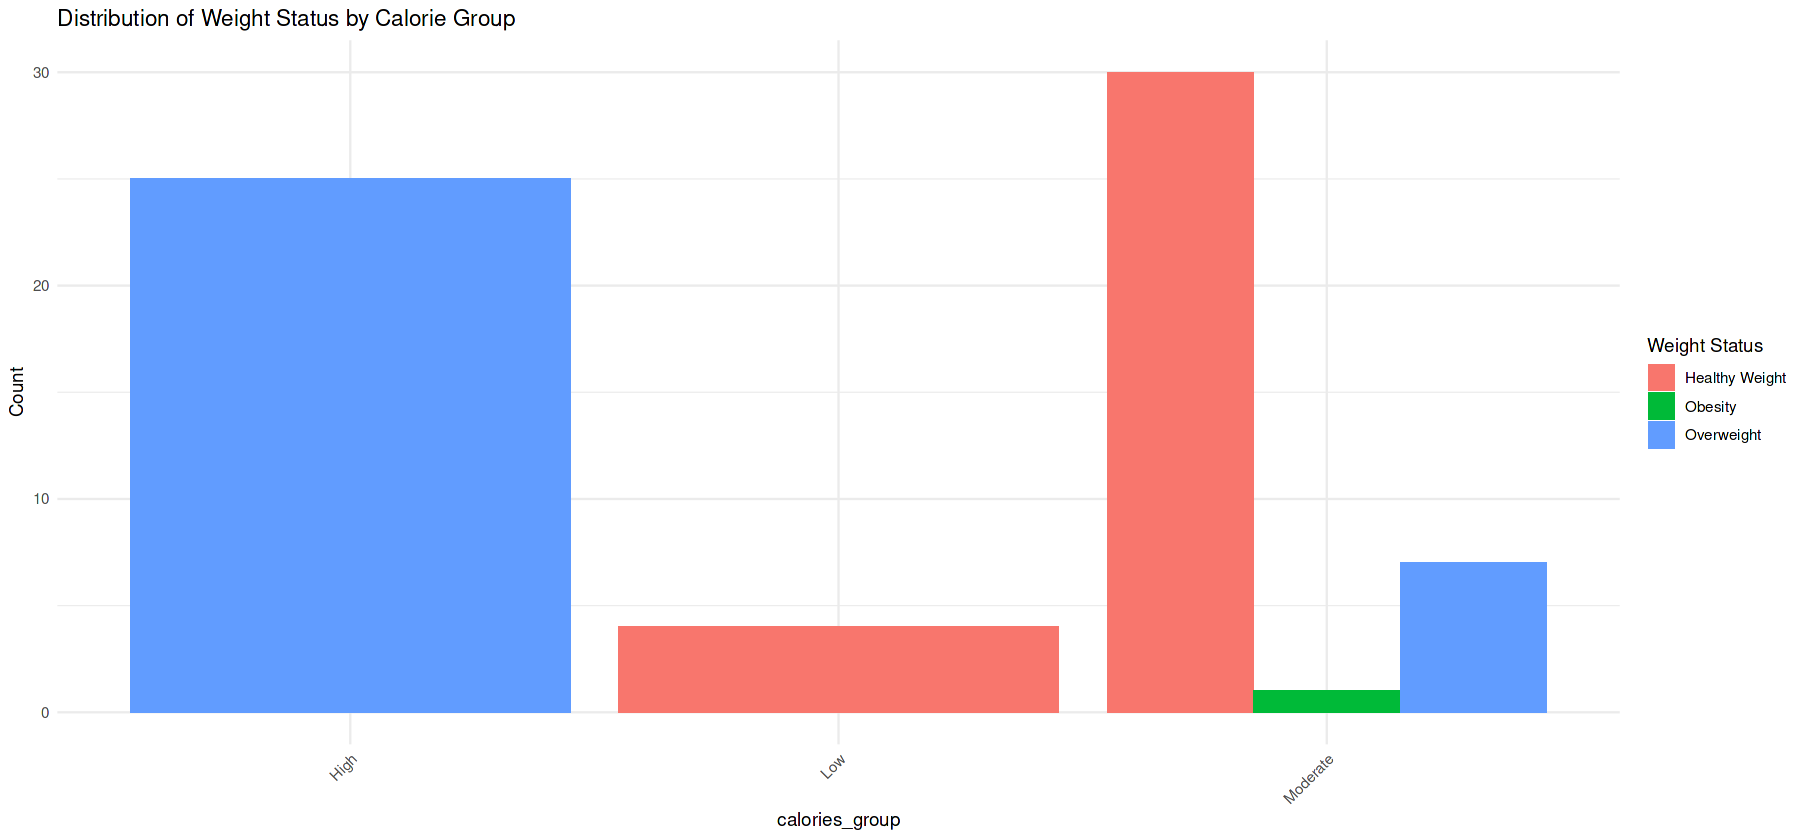

In [193]:
ggplot(merge_activity_body, aes(x = calories_group, fill = Weight_Status)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of Weight Status by Calorie Group",
       x = "calories_group",
       y = "Count",
       fill = "Weight Status") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

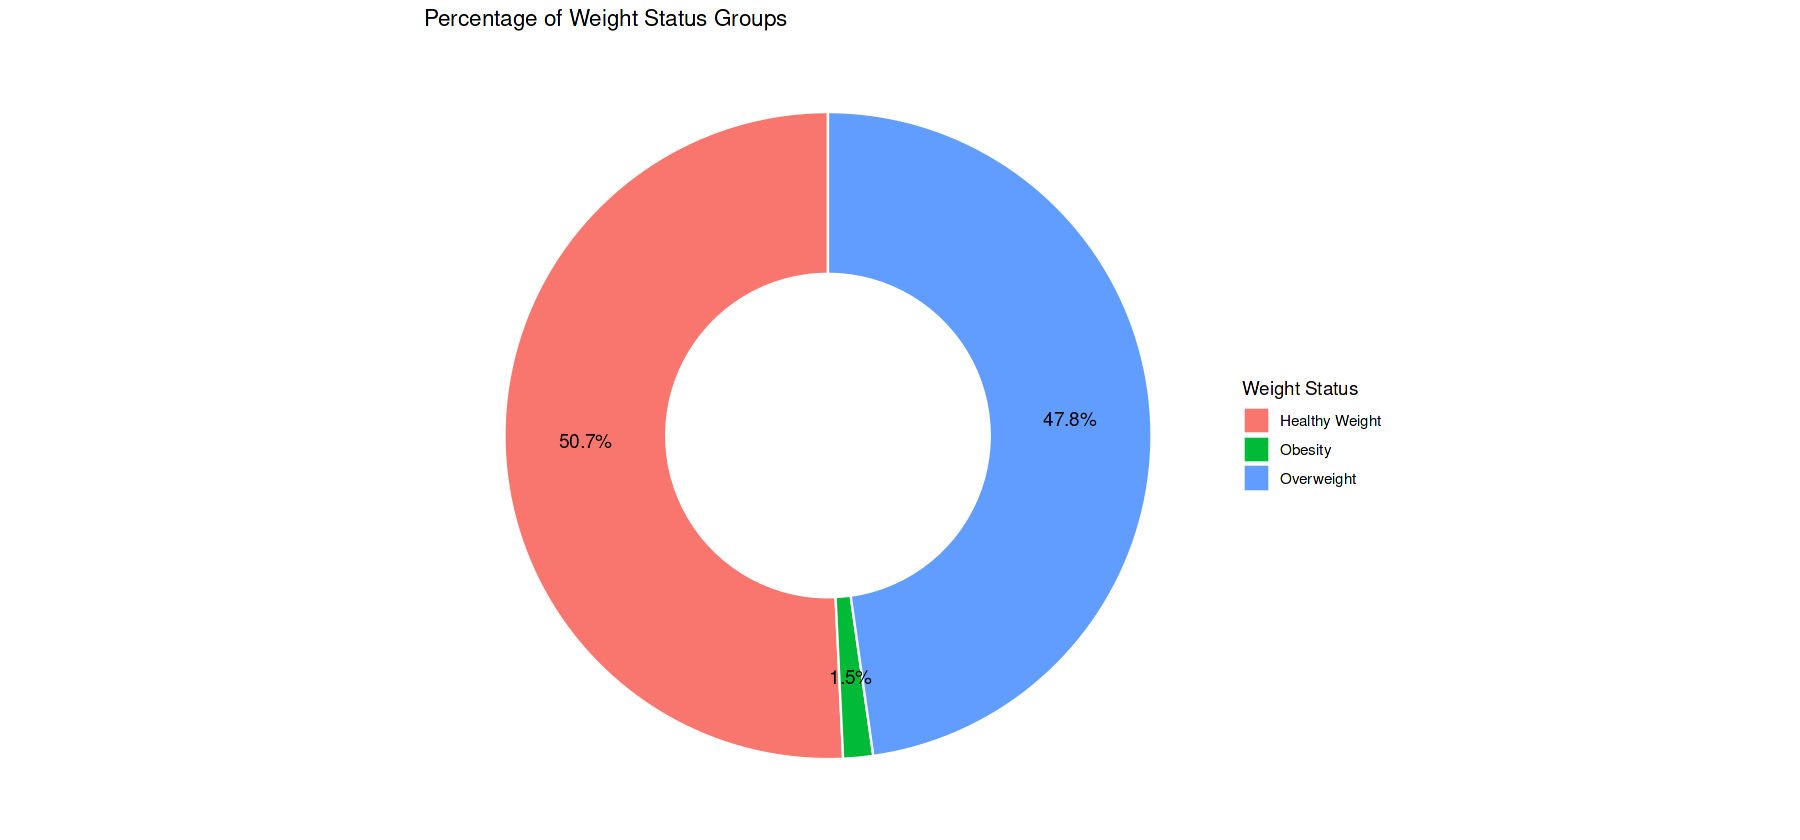

In [194]:
# Summarize the data to calculate the percentage of each Weight_Status group
summary_data <- merge_activity_body %>%
  group_by(Weight_Status) %>%
  summarise(count = n(), .groups = 'drop') %>%
  mutate(percentage = count / sum(count) * 100)

# Create a donut chart
ggplot(summary_data, aes(x = 2, y = percentage, fill = Weight_Status)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_stack(vjust = 0.5)) +
  xlim(0.5, 2.5) +  # Adjust the x-axis limits to create the donut hole
  theme_void() +  # Remove background, gridlines, and axis
  theme(legend.position = "right") +
  labs(title = "Percentage of Weight Status Groups",
       fill = "Weight Status")


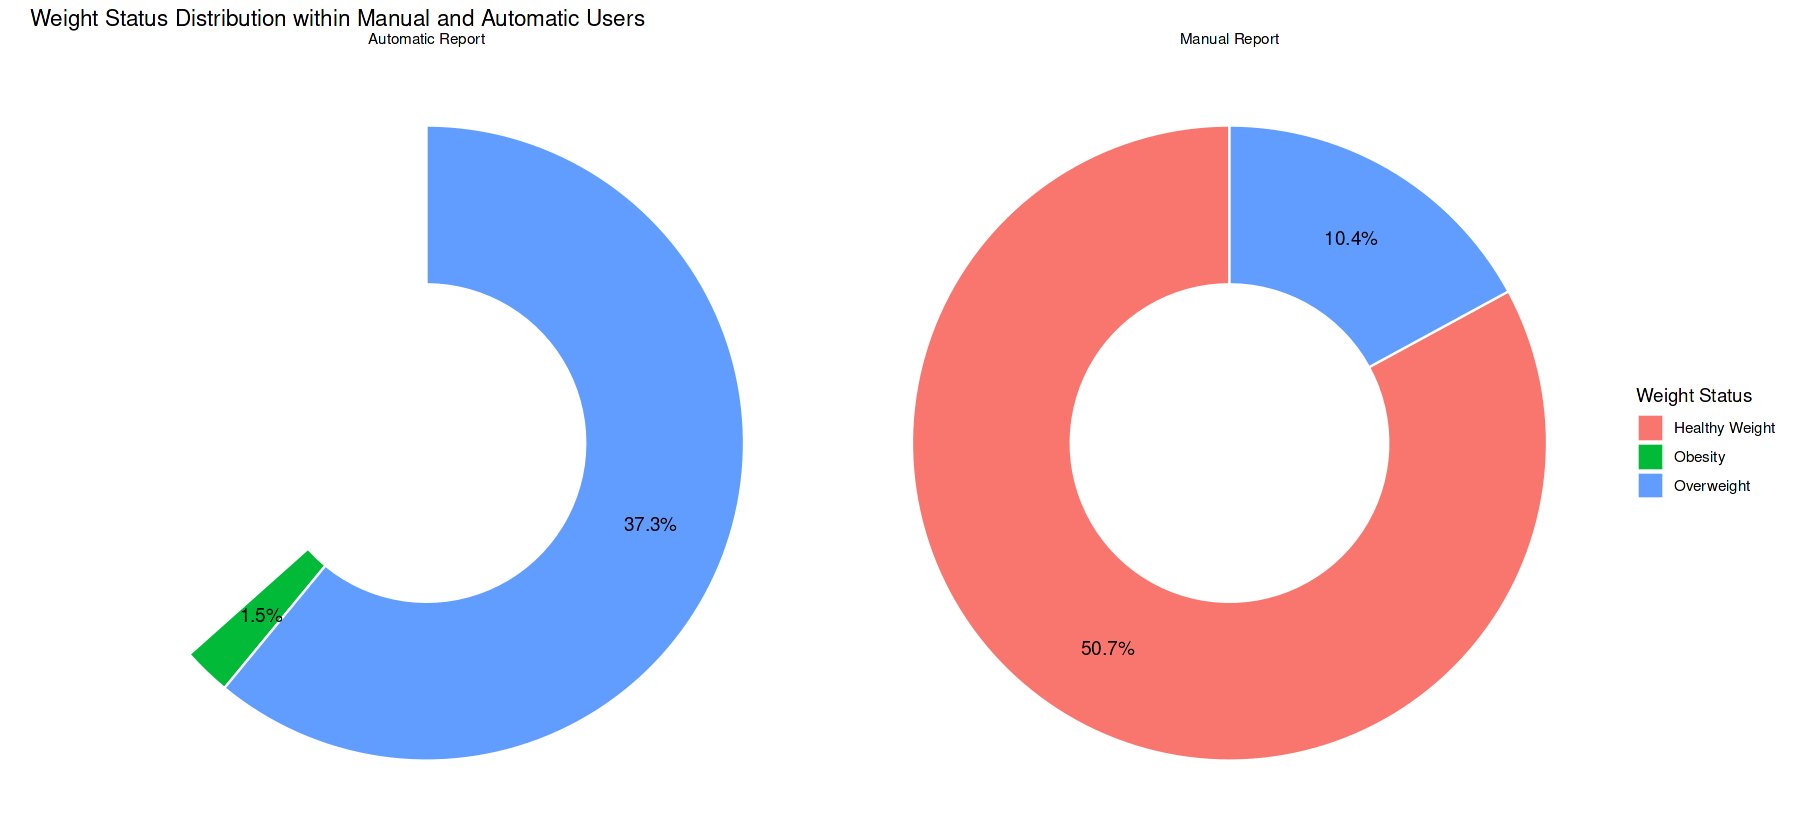

In [195]:
# Summarize the data to calculate the percentage of weight status within each manual report group
summary_weight_status <- merge_activity_body %>%
  group_by(is_manual_report, Weight_Status) %>%
  summarise(count = n(), .groups = 'drop') %>%
  mutate(percentage = count / sum(count) * 100)

# Create a donut chart for weight status within each manual report group
ggplot(summary_weight_status, aes(x = 2, y = percentage, fill = Weight_Status)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_stack(vjust = 0.5)) +
  facet_wrap(~ is_manual_report, labeller = labeller(is_manual_report = c(`TRUE` = "Manual Report", `FALSE` = "Automatic Report"))) +
  xlim(0.5, 2.5) +  # Adjust the x-axis limits to create the donut hole
  theme_void() +  # Remove background, gridlines, and axis
  theme(legend.position = "right") +
  labs(title = "Weight Status Distribution within Manual and Automatic Users",
       fill = "Weight Status")


By looking the above graph it can say that manually report is famous for healthy user. but it has very less interective in term of obesity and the overweight user. 

Only 24% of the User are use the body data to track recods.

Lets check the persentage of the user now:-


Manual Method: 

* (50 % of the Healthy User) Out of 33 Users are found Healthy which makes 12% of the users prefer to use manual methods.
* (10% of the Overweight User) Out of 33 Users are found Overweight which makes 2.5 % of the User prefer to use manual methods.

Automatic Method:

* (37% of the Overweight User) Out of 33 Users are found Overweight which makes 9 % of the User prefer to use Autometic methods.
* (1.5% of the Obesity  User) Out of 33 Users are found Obesity which makes 0.4 % of the User prefer to use Autometic methods.

In [196]:
# Create a set of unique ids for every group of users
steps_ids <- unique(fitbit_activity_copy$id)
sleep_ids <- unique(fitbit_sleep_copy$id)
heartrate_ids <- unique(fitbit_heartbeat_copy$id)
weight_ids <- unique(fitbit_body_copy$id)

In [197]:
install.packages("VennDiagram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



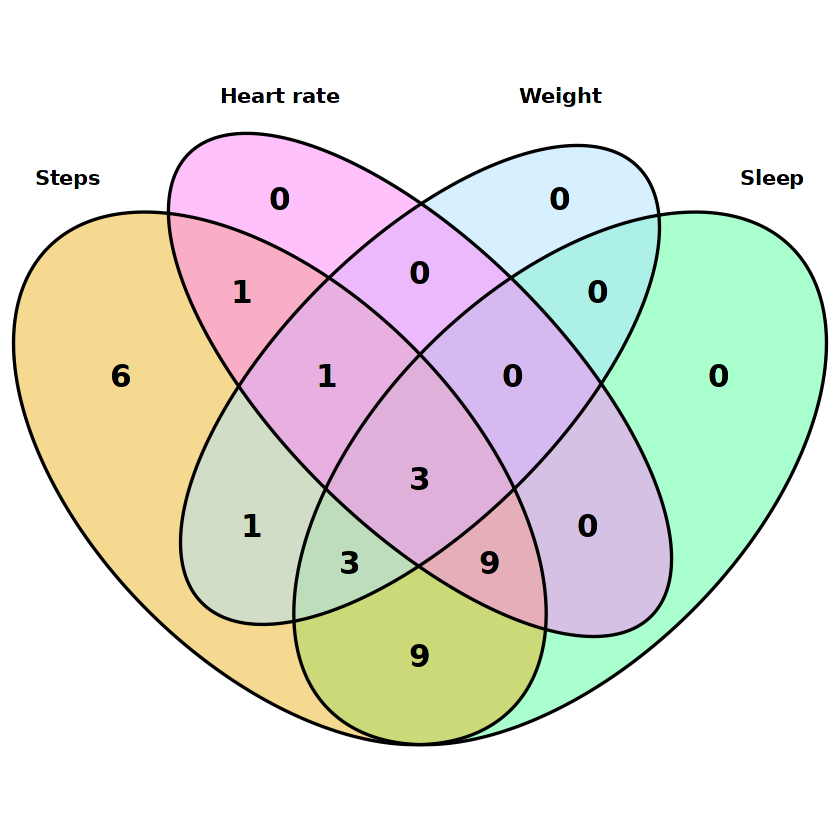

In [198]:
library(VennDiagram)

options(repr.plot.width = 7, repr.plot.height = 7) # specify the desired size of the figure

# Create a venn diagram
plot <- venn.diagram(
  x = list(steps_ids, sleep_ids, heartrate_ids, weight_ids),
  category.names = c("Steps" , "Sleep" , "Heart rate", "Weight"),
  filename = NULL,
  fill = c("goldenrod2", "seagreen1", "orchid1", "lightskyblue1"),
  cex = 1.5, fontface = "bold", fontfamily = "sans", # formatting of numbers
  cat.cex = 1, cat.fontface = "bold", cat.fontfamily = "sans") # formatting of set names
grid::grid.draw(plot)

Out of 33 Users, below mentioned the Percentage:-

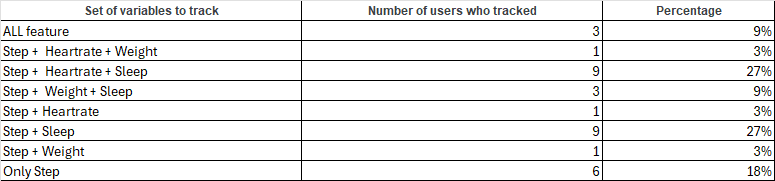

#### Multi-feature users:

* 100% (33 Ids) have STEPS count records (combine with or without other features)
* 73% (24 Ids) have STEPS count and SLEEP tracking records (this subgroup is fairly close to that of Bellabeat's users)
* 42% (14 Ids) have STEPS count and HEARTRATE monitoring records
* 24% (8 Ids) have STEPS count and WEIGHT tracking records
* 9% (3 Ids) have all four featured records of STEPS - SLEEP - HEARTRATE - WEIGHT

Of which:-

**Single-feature records or users:**

18% (6 Ids) have only STEPS count records (no other features being used)

**Duo-feature users:**

27% (9 Ids) have only duo-feature of STEPS - SLEEP records (This subgroup is the closest one to that of Bellabeat's Leaf users as purely recorded Steps - Sleep)
1 id has only the duo feature of STEPS - WEIGHT record
1 id has duo feature of STEPS - HEARTRATE record

**Trio_feature users:**

27% (9 ids) used 3 features of STEPS - SLEEP - HEARTRATE
9% (3 ids) used 3 features of STEPS - SLEEP - WEIGHT
1 id used trio-feature STEPS - HEARTRATE - WEIGHT

**Features with 0 users:**

0 Id used only HEARTRATE or WEIGHT or SLEEP feature alone
0 Id used only duo features of HEARTRATE - WEIGHT or SLEEP - WEIGHT or HEARTRATE - SLEEP

The user group of 9 Ids that have only a duo-feature of STEPS - SLEEP records is the closest to Leaf users. 

Unfortunately, the sample for this segment is relatively small.

In [199]:
# Install DataExplorer (if not already installed)
install.packages("DataExplorer")

# Load the package
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



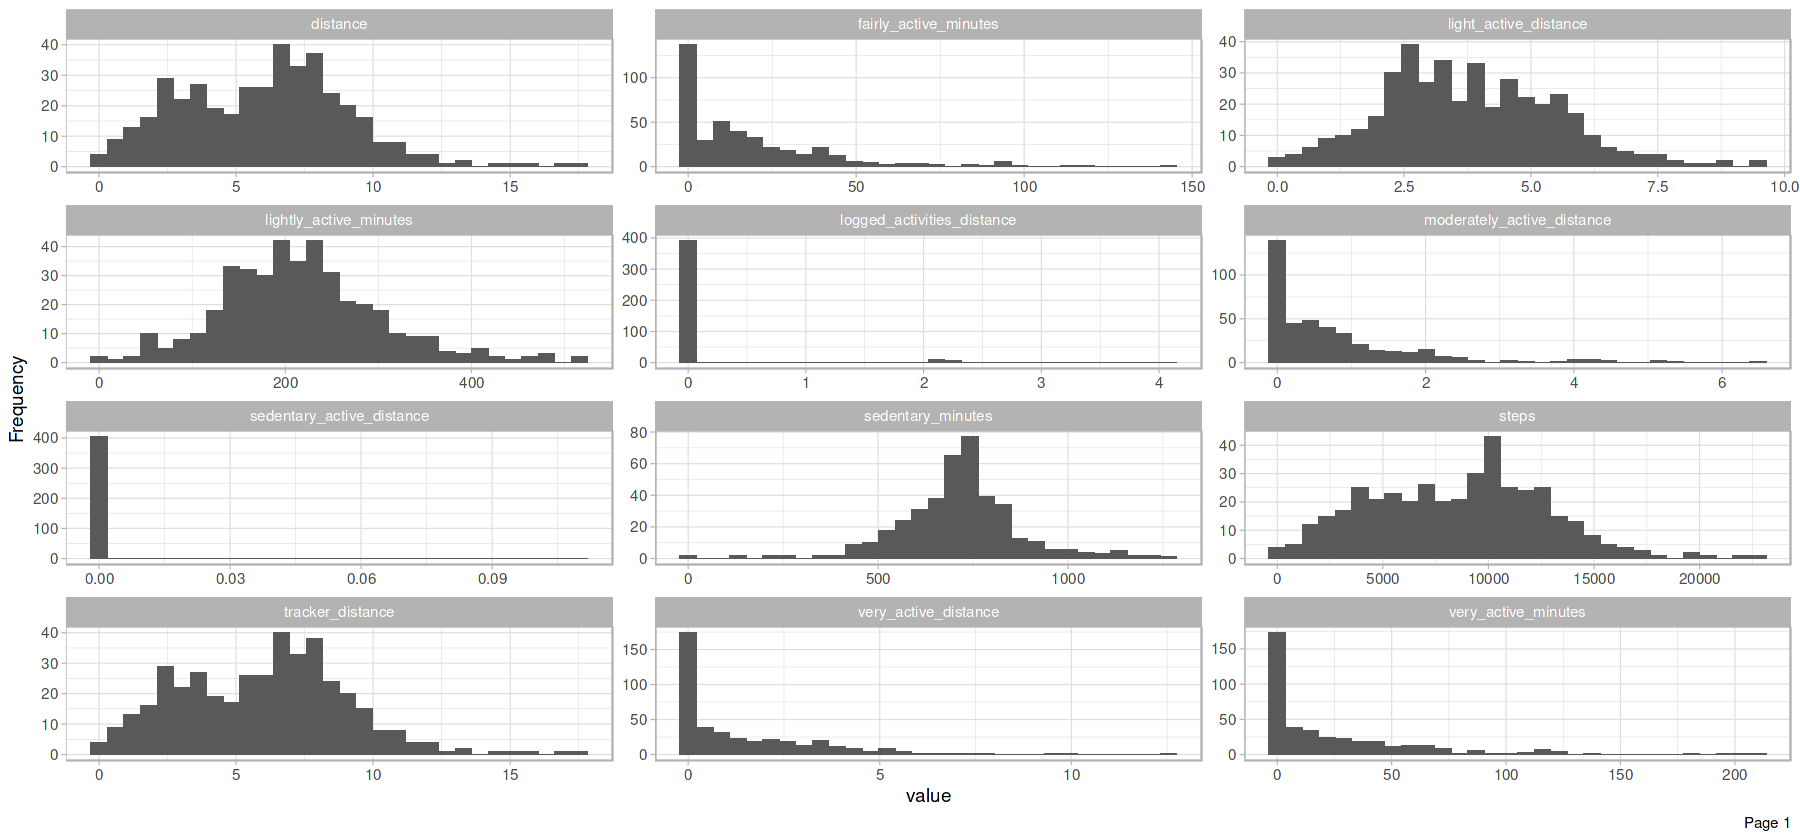

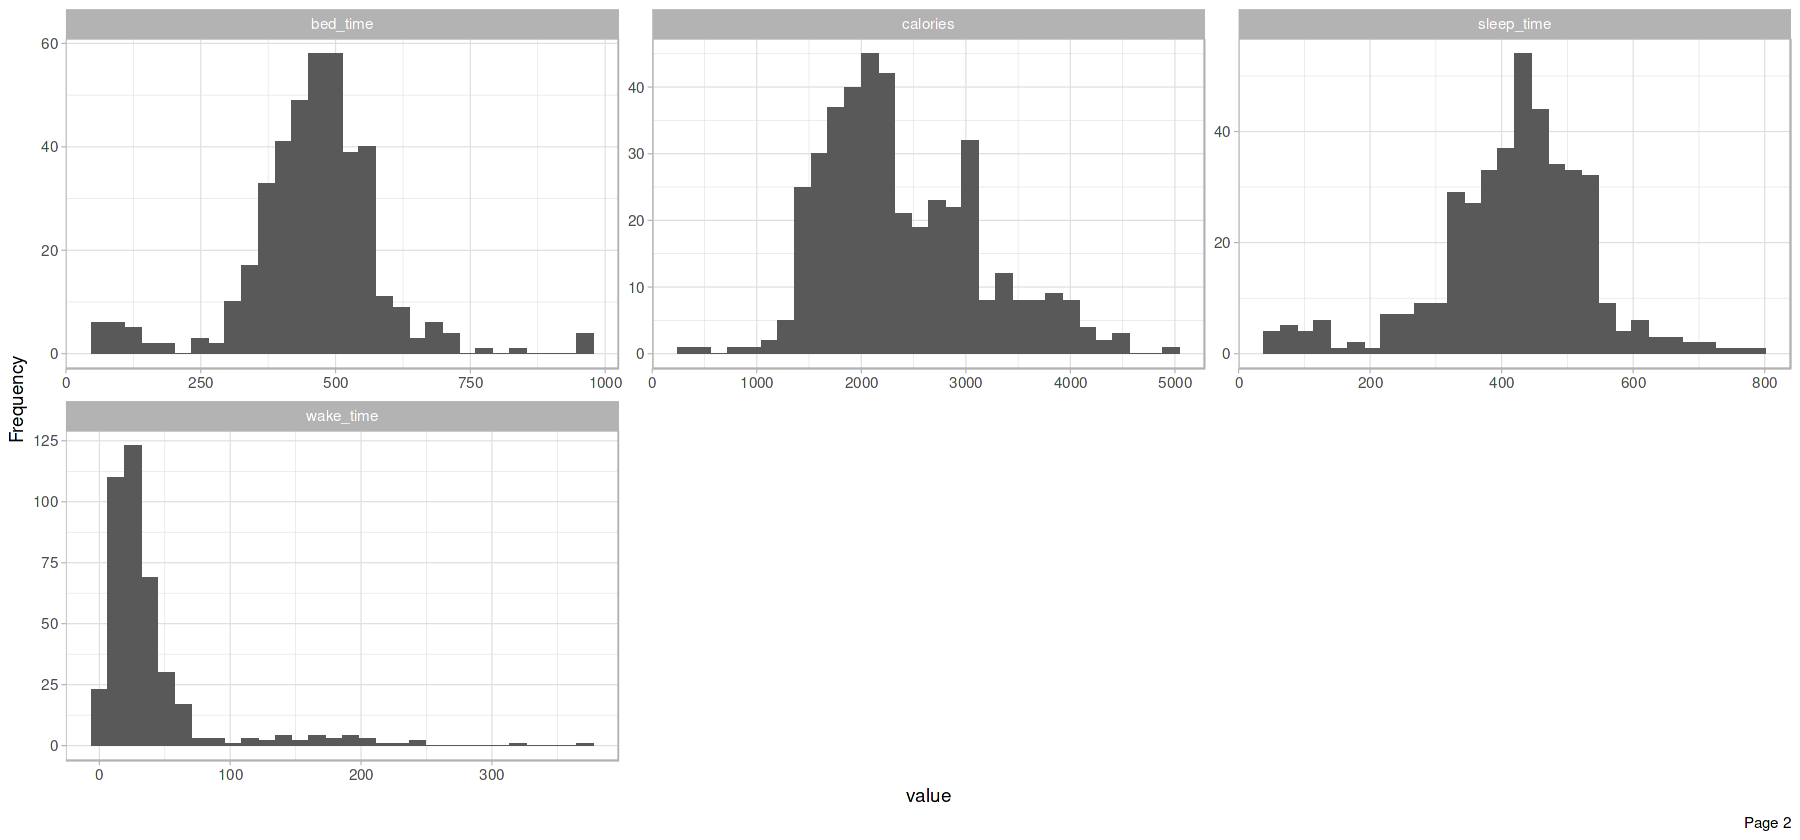

In [200]:
options(repr.plot.width = 15, repr.plot.height = 7) # specify the desired size of the figure
merge_activity_sleep %>%
  select(-c("id")) %>%
  plot_histogram(ncol = 3, ggtheme = theme_light())


In [201]:
# Get number of days a user used their device in a 31 day period:
obs_days <- merge_activity_sleep %>% group_by(id) %>% 
  summarise(num_dayuse = sum(n()), .groups = "drop") %>% 
  arrange(-num_dayuse)
head(obs_days)

id,num_dayuse
<dbl>,<int>
5553957443,31
6962181067,31
8378563200,31
2026352035,28
3977333714,28
4445114986,28


In [202]:
# Classify users into usage ranges
usage <- obs_days %>% 
  mutate(group = case_when(
    between(num_dayuse, 1, 10) ~ "low usage",
    between(num_dayuse, 11, 20) ~ "moderate usage",
    between(num_dayuse, 21, 31) ~ "high usage",
    TRUE ~ NA_character_
    ))
# Create a df with new attributes
usage_df <- merge_activity_sleep %>% 
  left_join(usage, by = "id")
# Compute percentage of each usage groups 
sum_usage <- usage %>% 
  mutate(group = fct_relevel(group, c("high usage", "moderate usage", "low usage"))) %>% 
  group_by(group) %>%  
  summarise(num_users = n()) %>% 
  mutate(percent = num_users/sum(num_users)*100)

In [203]:
install.packages("formattable")
library(formattable)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [204]:
formattable(sum_usage, list(percent = color_bar("yellow")))

group,num_users,percent
<fct>,<int>,<dbl>
high usage,12,50.0
moderate usage,3,12.5
low usage,9,37.5


In general, users didn't wear their devices on a day in day out basis. This is not a surprising fact, although after observing the number of days each user wore their fitness tracker (or had data on that day), I have noticed that surprisingly some users would keep their devices on daily or almost every day (n = 27 ~ 31 days) while few of them used their devices just only a few days and others reached the average number of days in the recording period.

Stats:

* 50% of users who used their devices frequently on a nearly day-in-day-out basis (on a 21-31 day scale),

* 12% of users who moderately used their devices (on an 11-20 day scale),

* 38% of users who used their devices least frequently (on a 1-10 day scale)